In [15]:
import matplotlib.pyplot as plt  # pyright: ignore[reportMissingImports]
import matplotlib.dates as mdates
import requests


In [16]:
mnogo_bukav = requests.get("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/opendata.stat").text

In [17]:
headers = ["name","region","date","value"]
data = {
    'name':[],
    'region':[],
    'date':[],
    'value':[]
}
for string in mnogo_bukav.split("\n")[1:]:
    items = string.split(",")
    if len(items) < 4:
        continue
    
    if items[1] != 'Забайкальский край' or items[0] != 'Средняя пенсия' or ('2018' not in items[2]): 
        continue
    for key,item in zip(headers,items):
        data[key].append(item)


In [18]:
#сортировка по времени

for i in range(len(data['date'])):
    for j in range(i, len(data['date'])):
        if data['date'][i] > data['date'][j]:
            data['date'][i],data['date'][j] = data['date'][j],data['date'][i]
            data['value'][i], data['value'][j] = data['value'][j], data['value'][i]
data['date']

['2018-01-15',
 '2018-02-15',
 '2018-03-15',
 '2018-04-15',
 '2018-05-15',
 '2018-06-15',
 '2018-07-15',
 '2018-08-15',
 '2018-09-15',
 '2018-10-15',
 '2018-11-15']

In [20]:
for i in range(len(data['date'])):
    data['date'][i] = data['date'][i][5:]
data['date']

['01-15',
 '02-15',
 '03-15',
 '04-15',
 '05-15',
 '06-15',
 '07-15',
 '08-15',
 '09-15',
 '10-15',
 '11-15']

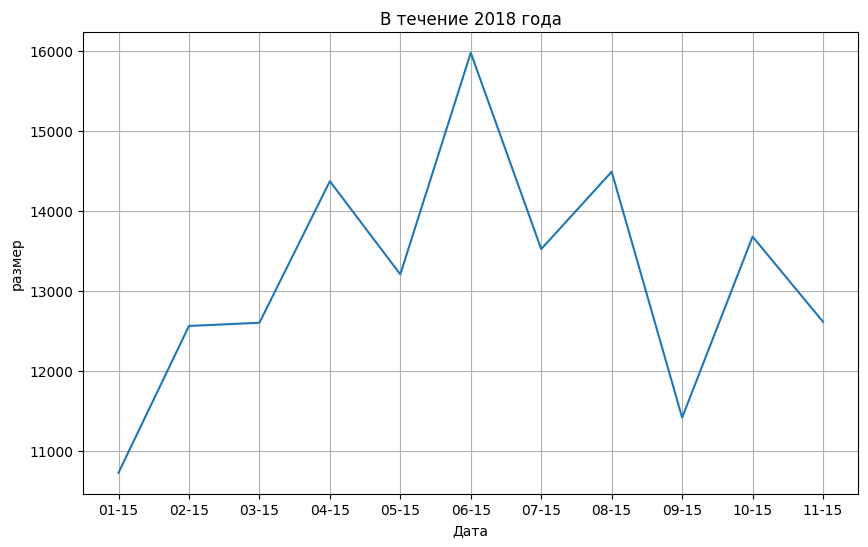

In [24]:
plt.figure(figsize = (10,6))
plt.plot(data['date'], list(map(int,data['value'])), linestyle = '-')
plt.title('В течение 2018 года')
plt.xlabel('Дата')
plt.ylabel('размер')
plt.grid(True)